C:\Users\User\AppData\Local\Temp\ipykernel_6652\4257591592.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_selling, x='product_name', y='quantity', palette='viridis')


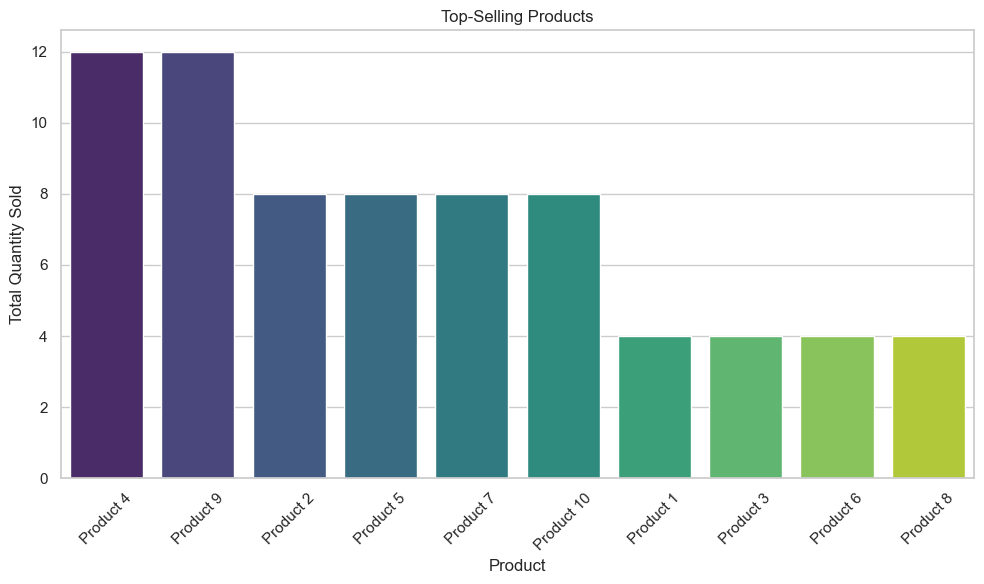

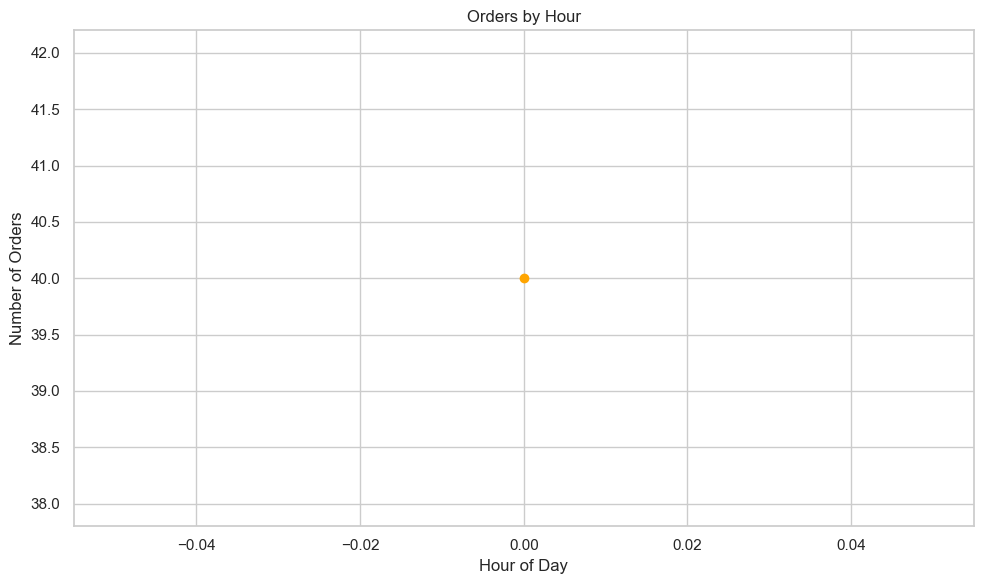

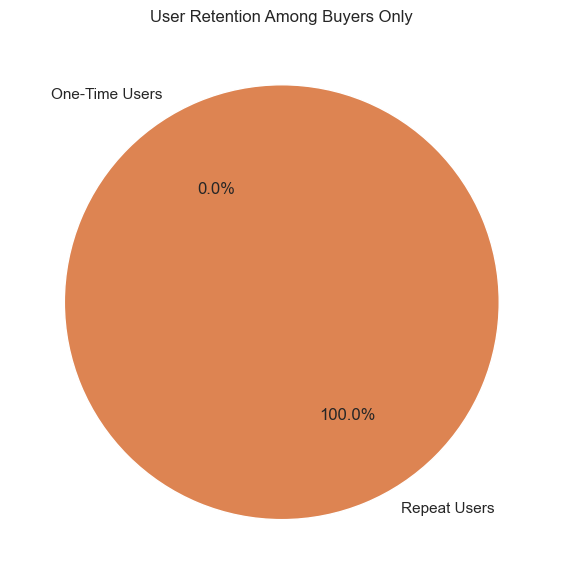

C:\Users\User\AppData\Local\Temp\ipykernel_6652\4257591592.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated, x='rating', y='product_name', palette='coolwarm')


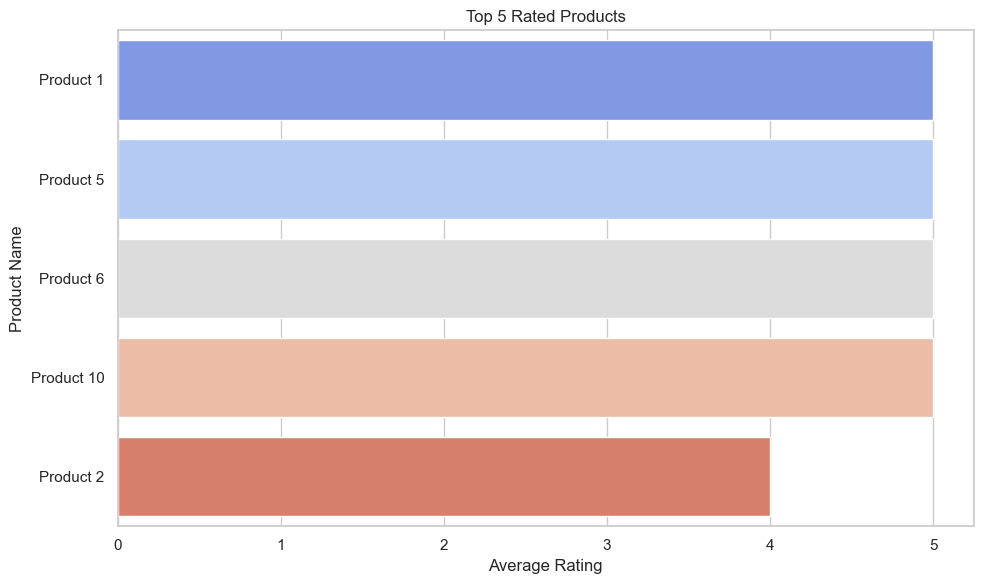


--- Summary of Insights ---
Top Selling Product: Product 4
Top Rated Product: Product 1
Peak Order Hour: 0
Repeat User %: 100.0


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSVs
products = pd.read_csv("products.csv")
users = pd.read_csv("users.csv")
orders = pd.read_csv("orders.csv")
reviews = pd.read_csv("reviews.csv")

# --- 1. Top-Selling Products ---
top_selling = orders.groupby('product_id')['quantity'].sum().reset_index()
top_selling = top_selling.merge(products, on='product_id')
top_selling = top_selling.sort_values(by='quantity', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=top_selling, x='product_name', y='quantity', palette='viridis')
plt.title("Top-Selling Products")
plt.xlabel("Product")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- 2. Peak Order Hours ---
orders['order_date'] = pd.to_datetime(orders['order_date'])
orders['hour'] = orders['order_date'].dt.hour
orders_by_hour = orders.groupby('hour').size()

plt.figure(figsize=(10,6))
orders_by_hour.plot(kind='line', marker='o', color='orange')
plt.title("Orders by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- 3. User Retention ---
user_orders = orders['user_id'].value_counts()
retention = {
    'One-Time Users': (user_orders == 1).sum(),
    'Repeat Users': (user_orders > 1).sum()
}

plt.figure(figsize=(6,6))
plt.pie(retention.values(), labels=retention.keys(), autopct='%1.1f%%', startangle=120)
plt.title("User Retention Among Buyers Only")
plt.tight_layout()
plt.show()

# --- 4. Top Rated Products ---
avg_rating = reviews.groupby('product_id')['rating'].mean().reset_index()
avg_rating = avg_rating.merge(products, on='product_id')
top_rated = avg_rating.sort_values(by='rating', ascending=False).head(5)

plt.figure(figsize=(10,6))
sns.barplot(data=top_rated, x='rating', y='product_name', palette='coolwarm')
plt.title("Top 5 Rated Products")
plt.xlabel("Average Rating")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()

# --- 5. Summary (Console Output) ---
summary = {
    "Top Selling Product": top_selling.iloc[0]['product_name'],
    "Top Rated Product": top_rated.iloc[0]['product_name'],
    "Peak Order Hour": orders_by_hour.idxmax(),
    "Repeat User %": round(100 * retention['Repeat Users'] / sum(retention.values()), 2)
}

print("\n--- Summary of Insights ---")
for k, v in summary.items():
    print(f"{k}: {v}")
